In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup

In [5]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [169]:
df = pd.read_csv('./data/universe_code.csv')
df.head()

,종목명,현재가,대비,대비(%),거래량,L(일봉)H,종목코드,거래량 (G),거래대금(만원) (H),매출액 영업이익률(%) (L),결산기준 (L),매출액 순이익률(%) (M),결산기준 (M),매출액(백만원) (A1),결산기준 (A1),매출액(백만원) (B1),결산기준 (B1),매출액(백만원) (C1),결산기준 (C1)
0,DL,"78,300","-2,000",-2.49,"341,200",-2.49,A000210,"341,200","2,665,082",11.65,Dec-19,7.32,Dec-19,"9,700,078",Dec-19,"10,984,485",Dec-18,"12,335,536",Dec-17
1,유유제약,"12,400",-250,-1.98,"33,195",-1.98,A000220,"33,195","41,476",8.89,Dec-19,6.12,Dec-19,"90,877",Dec-19,"83,096",Dec-18,"62,852",Dec-17
2,한국앤컴퍼니,"17,000",-300,-1.73,"350,644",-1.73,A000240,"350,644","590,353",20.16,Dec-19,19.26,Dec-19,"847,609",Dec-19,"847,957",Dec-18,"824,846",Dec-17
3,삼천당제약,"55,800","-3,200",-5.42,"821,467",-5.42,A000250,"821,467","4,551,879",13.51,Dec-19,10.50,Dec-19,"186,602",Dec-19,"159,960",Dec-18,"160,587",Dec-17
4,SK하이닉스,"140,000","-2,000",-1.41,"6,091,444",-1.41,A000660,"6,091,444","84,427,125",10.05,Dec-19,7.47,Dec-19,"26,990,733",Dec-19,"40,445,066",Dec-18,"30,109,434",Dec-17


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   종목명               508 non-null    object 
 1   현재가               508 non-null    object 
 2   대비                483 non-null    object 
 3   대비(%)             508 non-null    float64
 4   거래량               508 non-null    object 
 5   L(일봉)H            508 non-null    float64
 6   종목코드              508 non-null    object 
 7   거래량 (G)           508 non-null    object 
 8   거래대금(만원) (H)      508 non-null    object 
 9   매출액 영업이익률(%) (L)  508 non-null    float64
 10  결산기준 (L)          508 non-null    object 
 11  매출액 순이익률(%) (M)   508 non-null    float64
 12  결산기준 (M)          508 non-null    object 
 13  매출액(백만원) (A1)     508 non-null    object 
 14  결산기준 (A1)         508 non-null    object 
 15  매출액(백만원) (B1)     508 non-null    object 
 16  결산기준 (B1)         508 non-null    object 
 1

In [171]:
codes = df.종목코드.apply(lambda x: x[1:]).values
codes

array(['000210', '000220', '000240', '000250', '000660', '000990',
       '001340', '001390', '001500', '001750', '001800', '001820',
       '001880', '002310', '002350', '002390', '002870', '003090',
       '003220', '003410', '003530', '003550', '003670', '003780',
       '003850', '004000', '004170', '004490', '004590', '005290',
       '005670', '005690', '005880', '005930', '006060', '006220',
       '006390', '006400', '006620', '006650', '006740', '007330',
       '007340', '007570', '007700', '008490', '009150', '009420',
       '009780', '009970', '010050', '010130', '010240', '010640',
       '010780', '011040', '011170', '011330', '011780', '012330',
       '012510', '012630', '012700', '012750', '012790', '013030',
       '013120', '013810', '013890', '014570', '014680', '014830',
       '015230', '015710', '016090', '016360', '016580', '016600',
       '016610', '017040', '017510', '017890', '017960', '018250',
       '018260', '018310', '019550', '020000', '020150', '0207

In [35]:
driver = webdriver.Chrome()

In [177]:
url = 'https://finance.naver.com/item/coinfo.naver?code=005930&target=finsum_more'
driver.get(url)
time.sleep(1)
driver.switch_to.frame("coinfo_cp")
time.sleep(1)
driver.find_element_by_id('cns_Tab22').click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_5600/936094509.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


In [178]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html class="js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" lang="ko" style=""><head>
<title>온라인기업정보 - 기업모니터 - 기업개요(삼성전자)</title>
<link href="/favicon.ico" rel="shortcut icon"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script language="javascript" src="/include/domain.js" type="text/javascript"></script>
<!--[if (!IE) | (gt IE 8)]>
    	<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />
    <![endif]-->
<

In [32]:
# 1. iframe src => src
# 2. selenium => 

In [179]:
tables = pd.read_html(html, encoding='utf-8')

In [180]:
len(tables)

18

In [233]:
fin_df = tables[12]
fin_df.head()

주요재무정보                분기                                      \
       주요재무정보 2020/09  (IFRS연결) 2020/12  (IFRS연결) 2021/03  (IFRS연결)   
0         매출액           22219.0          -56671.0            5099.0   
1        영업이익            2496.0           -7270.0             660.0   
2  영업이익(발표기준)            2496.0           -7270.0             660.0   
3    세전계속사업이익            2954.0           -9000.0            2416.0   
4       당기순이익            2291.0            -682.0            3246.0   

                                                            \
  2021/06  (IFRS연결) 2021/09  (IFRS연결) 2021/12(E)  (IFRS연결)   
0            5812.0            6226.0               6376.0   
1             475.0             745.0                597.0   
2             475.0             745.0                  NaN   
3            4759.0            1225.0                  NaN   
4            4502.0             974.0                511.0   

                                             
  2022/03(E)  (IFRS연결) 2022/06(E)  (IFRS연결)  
0               6436.0               6233.0  
1                622.0                478.0  
2                  NaN                  NaN  
3                  NaN                  NaN  
4                846.0               1015.0

In [234]:

fin_df = fin_df.T.iloc[:6]
fin_df.columns = fin_df.iloc[0]
fin_df.drop('주요재무정보', inplace=True)
fin_df


C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


('주요재무정보', '주요재무정보')      매출액    영업이익 영업이익(발표기준) 세전계속사업이익   당기순이익 당기순이익(지배)  \
분기 2020/09  (IFRS연결)  22219.0  2496.0     2496.0   2954.0  2291.0    2037.0   
   2020/12  (IFRS연결) -56671.0 -7270.0    -7270.0  -9000.0  -682.0    -768.0   
   2021/03  (IFRS연결)   5099.0   660.0      660.0   2416.0  3246.0    3181.0   
   2021/06  (IFRS연결)   5812.0   475.0      475.0   4759.0  4502.0    4499.0   
   2021/09  (IFRS연결)   6226.0   745.0      745.0   1225.0   974.0     911.0   

('주요재무정보', '주요재무정보') 당기순이익(비지배)      자산총계      부채총계     자본총계  ...   부채비율  \
분기 2020/09  (IFRS연결)      254.0  139520.0   68108.0  71412.0  ...  95.37   
   2020/12  (IFRS연결)       86.0  139019.0  106905.0  32113.0  ...  332.9   
   2021/03  (IFRS연결)       65.0   66184.0   32413.0  33771.0  ...  95.98   
   2021/06  (IFRS연결)        3.0   74773.0   32142.0  42631.0  ...   75.4   
   2021/09  (IFRS연결)       62.0   79563.0   35834.0  43729.0  ...  81.95   

('주요재무정보', '주요재무정보')    자본유보율   EPS(원) PER(배)    BPS(원) PBR(배) 현금DPS(원)  \
분기 2020/09  (IFRS연결)  2959.79   5278.0    4.1  169000.0   0.46      0.0   
   2020/12  (IFRS연결)  2917.79  -1989.0   6.34   67178.0   1.24   1300.0   
   2021/03  (IFRS연결)  5866.65  17829.0   4.69  176887.0   0.49      0.0   
   2021/06  (IFRS연결)  5337.58  22320.0   2.58  173367.0   0.46      NaN   
   2021/09  (IFRS연결)  5402.67   4025.0   2.41  177645.0   0.43      NaN   

('주요재무정보', '주요재무정보') 현금배당수익률 현금배당성향(%)  발행주식수(보통주)  
분기 2020/09  (IFRS연결)     NaN       0.0  34800000.0  
   2020/12  (IFRS연결)     NaN     -65.6  34800000.0  
   2021/03  (IFRS연결)     NaN       NaN  15441262.0  
   2021/06  (IFRS연결)     NaN       NaN  20955884.0  
   2021/09  (IFRS연결)     NaN       0.0  20955884.0  

[5 rows x 33 columns]

In [235]:
fin_df.reset_index(inplace=True)

In [236]:
fin_df.drop('level_0', axis=1, inplace=True)

In [237]:
fin_df.index = fin_df.level_1.apply(lambda x:x.split()[0])
fin_df

"(주요재무정보, 주요재무정보)",level_1,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
level_1,,,,,,,,,,,,,,,,,,,,,
2020/09,2020/09 (IFRS연결),22219.0,2496.0,2496.0,2954.0,2291.0,2037.0,254.0,139520.0,68108.0,...,95.37,2959.79,5278.0,4.1,169000.0,0.46,0.0,NaN,0.0,34800000.0
2020/12,2020/12 (IFRS연결),-56671.0,-7270.0,-7270.0,-9000.0,-682.0,-768.0,86.0,139019.0,106905.0,...,332.9,2917.79,-1989.0,6.34,67178.0,1.24,1300.0,NaN,-65.6,34800000.0
2021/03,2021/03 (IFRS연결),5099.0,660.0,660.0,2416.0,3246.0,3181.0,65.0,66184.0,32413.0,...,95.98,5866.65,17829.0,4.69,176887.0,0.49,0.0,NaN,NaN,15441262.0
2021/06,2021/06 (IFRS연결),5812.0,475.0,475.0,4759.0,4502.0,4499.0,3.0,74773.0,32142.0,...,75.4,5337.58,22320.0,2.58,173367.0,0.46,NaN,NaN,NaN,20955884.0
2021/09,2021/09 (IFRS연결),6226.0,745.0,745.0,1225.0,974.0,911.0,62.0,79563.0,35834.0,...,81.95,5402.67,4025.0,2.41,177645.0,0.43,NaN,NaN,0.0,20955884.0


In [238]:
fin_df.columns
df[['매출액', '영업이익', '당기순이익', '자산총계', '자본총계', '부채총계', 'ROE(%)', 'ROA(%)',\
    'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)']]

,매출액,영업이익,당기순이익,자산총계,자본총계,부채총계,ROE(%),ROA(%),EPS(원),PER(배),BPS(원),PBR(배)
0,22219.0,2496.0,2291.0,139520.0,71412.0,68108.0,11.81,5.88,5278.0,4.10,169000.0,0.46
1,-56671.0,-7270.0,-682.0,139019.0,32113.0,106905.0,11.84,4.19,-1989.0,6.34,67178.0,1.24
2,5099.0,660.0,3246.0,66184.0,33771.0,32413.0,13.73,6.49,17829.0,4.69,176887.0,0.49
3,5812.0,475.0,4502.0,74773.0,42631.0,32142.0,17.58,8.70,22320.0,2.58,173367.0,0.46
4,6226.0,745.0,974.0,79563.0,43729.0,35834.0,14.85,7.34,4025.0,2.41,177645.0,0.43


In [105]:
fin_df.to_csv('./fin_data/qfin_{}.csv'.format('000220'))

FileNotFoundError: [Errno 2] No such file or directory: './fin_data/qfin_000220.csv'

In [353]:
for code in codes[:10]:
    
    # code값에 따른 스크롤링할 사이트 url 변경
    url = f'https://finance.naver.com/item/coinfo.naver?code={code}&target=finsum_more'     
    
    # 일반적 스크롤링이 불가능하여 selunium을 통한 접속후 iframe 전환
    # 재무재표의 분기값을 보기위해 분기값 클릭
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(1)
    driver.switch_to.frame("coinfo_cp")
    time.sleep(1)
    driver.find_element_by_id('cns_Tab22').click()

    # pandas 메소드인 read_html을 사용하여 table속성에 해당하는 값을 가져옴
    # encoding 후 html내 table들중 사용할 12번째 테이블만 인덱싱
    html = driver.page_source
    tables = pd.read_html(html, encoding='utf-8')
    fin_df = tables[12]
    
    # 행열은 전환
    # 전환후 첫번째 행값을 칼럼 값으로 대입
    # '주요재무정보' 삭제및 바로 적용
    fin_df = fin_df.T.iloc[:6]
    fin_df.columns = fin_df.iloc[0]
    fin_df.drop('주요재무정보', inplace=True)
    
    
    fin_df.reset_index(inplace=True)
    fin_df.drop('level_0', axis=1, inplace=True)

    fin_df.index = fin_df.level_1.apply(lambda x:x.split()[0])
    fin_df['Code'] = code
    fin_df.drop('level_1', axis=1, inplace=True)
    fin_df.reset_index(inplace=True)       
    
    fin_df.rename(columns = {'level_1': 'Date'}, inplace=True)
    fin_df.columns.name = ""
    
    fin_df.columns
    fin_df = fin_df[['Code', 'Date', '매출액', '영업이익', '당기순이익', '자산총계', '자본총계', '부채총계', 'ROE(%)', 'ROA(%)',\
        'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)']]
    fin_df.to_csv('./fin_data/qfin_{}.csv'.format(code))

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_5600/3339438961.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [360]:
fin_df

,Code,Date,매출액,영업이익,당기순이익,자산총계,자본총계,부채총계,ROE(%),ROA(%),EPS(원),PER(배),BPS(원),PBR(배)
0,001750,2020/09,1324.0,246.0,188.0,34661.0,3376.0,31286.0,13.67,1.26,1421.0,2.59,25570.0,0.33
1,001750,2020/12,1102.0,118.0,71.0,19677.0,3511.0,16166.0,14.22,2.42,539.0,2.66,26593.0,0.35
2,001750,2021/03,2055.0,360.0,245.0,45137.0,3706.0,41431.0,18.39,1.44,1848.0,2.44,28073.0,0.4
3,001750,2021/06,2301.0,359.0,258.0,37820.0,4003.0,33817.0,21.24,1.97,1945.0,2.93,30323.0,0.56
4,001750,2021/09,2241.0,249.0,171.0,33385.0,4198.0,29187.0,19.67,2.19,1288.0,3.3,31800.0,0.58


In [175]:
import os 

files = os.listdir('./fin_data')
files

['qfin_000210.csv',
 'qfin_000220.csv',
 'qfin_000240.csv',
 'qfin_000250.csv',
 'qfin_000660.csv',
 'qfin_000990.csv',
 'qfin_001340.csv',
 'qfin_001390.csv',
 'qfin_001500.csv',
 'qfin_001750.csv',
 'qfin_001800.csv',
 'qfin_001820.csv',
 'qfin_001880.csv',
 'qfin_002310.csv',
 'qfin_002350.csv',
 'qfin_002390.csv',
 'qfin_002870.csv']

In [176]:
for f in files:
    df = pd.read_csv('./fin_data/' + f)
#     print(df.rename(columns={'level_1': 'date'}))
    
    for i in range(len(df)):
        print(df.iloc[i])
        code = df.iloc[i].code
        
        date = df.iloc[i].level_1
        매출액 = df.iloc[i].매출액
        영업이익 = df.iloc[i].영업이익
        당기순이익 = df.iloc[i].당기순이익
        지신총계 = df.iloc[i].자산총계
        # 자본총계 = df.iloc[i].자본총계
        roe = df.iloc[i]['ROE(%)']
        roa = df.iloc[i]['ROA(%)']
        eps = df.iloc[i]['EPS(원)']
        per = df.iloc[i]['PER(배)']
        bps = df.iloc[i]['BPS(원)']
        pbr = df.iloc[i]['PBR(배)']
        
        sql = """
        insert into st_fin values('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');
        """.format(code, data, 매출액, 영업이익, 당기순이익, 자산총계, 자본총계, roe, roa, eps, per, bps, pbr)
        
        cursor.execute(sql)

level_1     2020/09
매출액         22219.0
영업이익         2496.0
당기순이익        2291.0
자산총계       139520.0
자본총계        71412.0
부채총계        68108.0
ROE(%)        11.81
ROA(%)         5.88
EPS(원)       5278.0
PER(배)          4.1
BPS(원)     169000.0
PBR(배)         0.46
Name: 0, dtype: object


NameError: name '자산총계' is not defined

In [115]:
import MySQLdb

In [117]:
db = MySQLdb.connect(host='localhost', port=3306, user='root', password='1234', charset='utf8')

In [118]:
cursor = db.cursor()

In [124]:
sql = """
create database if not exists fin_db;
"""

cursor.execute(sql)

1

In [125]:
sql = """
use fin_db;
"""

cursor.execute(sql)

0

In [126]:
['매출액', '영업이익', '당기순이익', '자산총계', '부채총계', '자본총계', 'ROE(%)', 'ROA(%)'\
           'EPS(원)', 'PER(배)', 'BRS(원)', 'PBR(배)']

['매출액',
 '영업이익',
 '당기순이익',
 '자산총계',
 '부채총계',
 '자본총계',
 'ROE(%)',
 'ROA(%)EPS(원)',
 'PER(배)',
 'BRS(원)',
 'PBR(배)']

In [ ]:
sql = """
create table if not exists st_fin(
code char(10),
data
)
"""

In [ ]:
### financedatareader

In [154]:
!pip install -U finance-datareader

In [160]:
import FinanceDataReader as fdr

In [161]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [163]:
df = fdr.DataReader('068270', '2022')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,198500,200000,196500,198500,417167,0.002525
2022-01-04,196500,199500,194000,194500,658570,-0.020151
2022-01-05,193500,193500,187000,187500,1113525,-0.035990
2022-01-06,183000,186000,179000,181000,1046403,-0.034667
2022-01-07,182000,186000,181500,182500,515433,0.008287
2022-01-10,183000,191500,180500,187000,874365,0.024658
2022-01-11,190000,198500,189500,196500,1047658,0.050802
2022-01-12,197500,198500,193000,197000,447595,0.002545
2022-01-13,197000,197500,192000,195000,479134,-0.010152


<AxesSubplot:xlabel='Date'>

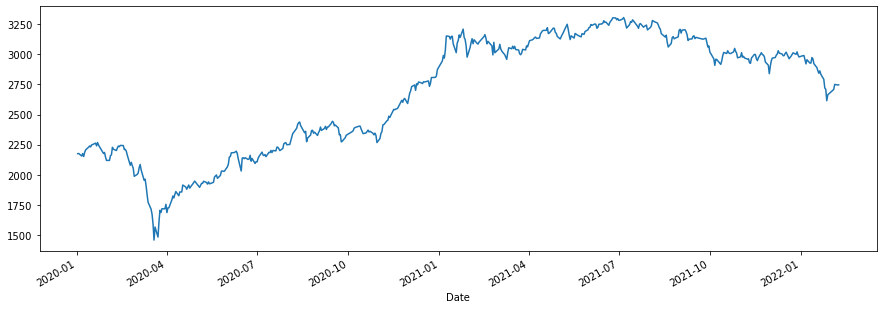

In [167]:
df = fdr.DataReader('ks11', '2020-01-01', '2022-02-08')
df.Close.plot(figsize=(15,5))